In [96]:
from typing import List

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression

In [72]:
# Loading MNIST dataset

mnist = fetch_openml("mnist_784", version=1)

x = mnist["data"].values / 255
y = mnist["target"]

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


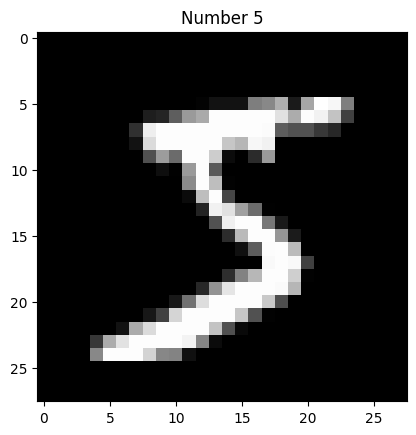

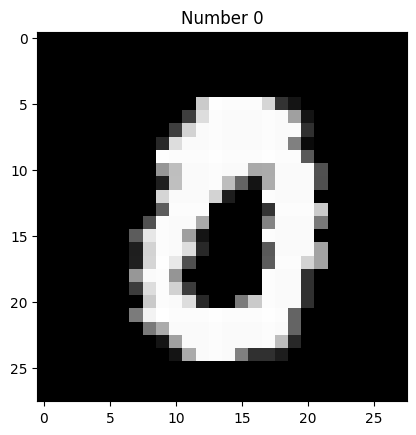

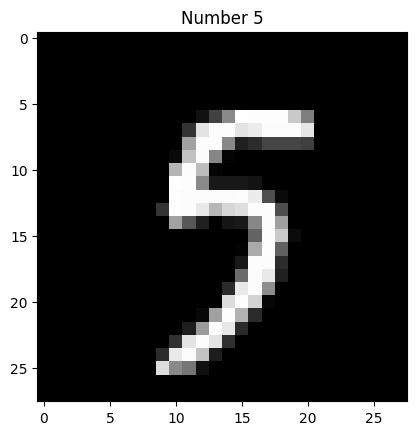

In [84]:
# Plotting multiple samples
index = 0
plt.imshow(x[index].reshape(28, 28), cmap="gray")
plt.title(f"Number {y[index]}")
plt.show()

index = 69
plt.imshow(x[index].reshape(28, 28), cmap="gray")
plt.title(f"Number {y[index]}")
plt.show()

index = 420
plt.imshow(x[index].reshape(28, 28), cmap="gray")
plt.title(f"Number {y[index]}")
plt.show()

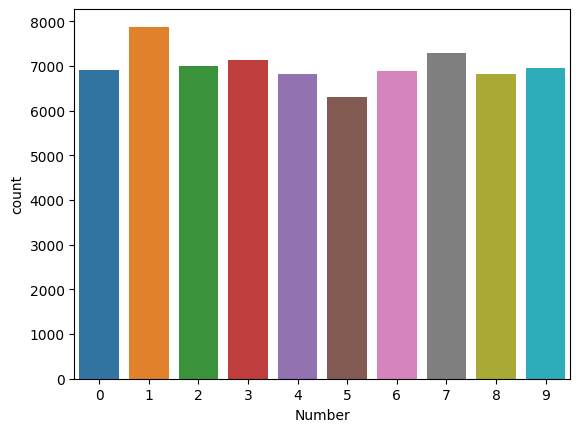

In [74]:
# Checking count of each class samples

sns.countplot(x=y)
plt.xlabel("Number")
plt.show()

In [93]:
# Splitting dataset

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(f"Train set size: {y_train.size}")
print(f"Test set size: {y_test.size}")

Train set size: 52500
Test set size: 17500


In [94]:
# Creating a holdout samples

_, x_train_small, _, y_train_small = train_test_split(x_train, y_train, test_size=0.3)

print(f"Holdout training set size: {y_train_small.size}")

Holdout training set size: 15750


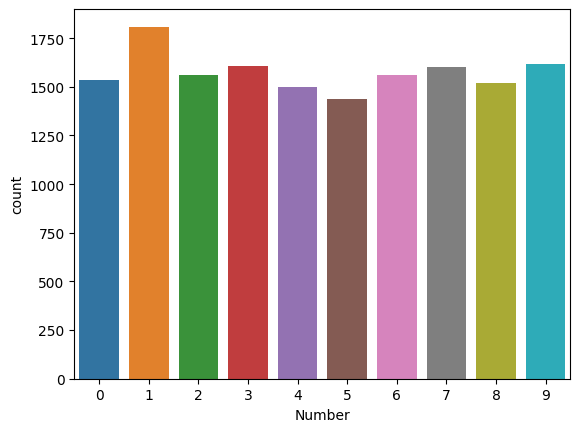

In [95]:
# Checking count of each class samples in smaller train set

sns.countplot(x=y_train_small)
plt.xlabel("Number")
plt.show()

In [99]:
# Play with baseline

logreg = LogisticRegression()
logreg.fit(x_train_small, y_train_small)

# Checking model's performance on test data

preds = logreg.predict(x_test)
print(f"F1 Macro: {f1_score(y_test, preds, average='macro')}")
print(classification_report(y_test, preds))

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Macro: 0.9062625704836847
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1783
           1       0.94      0.96      0.95      1896
           2       0.91      0.88      0.89      1770
           3       0.89      0.88      0.89      1832
           4       0.90      0.93      0.92      1702
           5       0.85      0.86      0.86      1548
           6       0.94      0.94      0.94      1771
           7       0.92      0.93      0.92      1762
           8       0.88      0.84      0.86      1738
           9       0.88      0.89      0.88      1698

    accuracy                           0.91     17500
   macro avg       0.91      0.91      0.91     17500
weighted avg       0.91      0.91      0.91     17500



In [106]:
# Defining model

layers: List[int] = [5, 2]
mlp = MLPClassifier(hidden_layer_sizes=layers, early_stopping=True, max_iter=10000)

In [107]:
# Training the model using small dataset

mlp.fit(x_train_small, y_train_small)

MLPClassifier(early_stopping=True, hidden_layer_sizes=[5, 2], max_iter=10000)

In [108]:
# Checking model's performance on train data

preds = mlp.predict(x_train_small)
print(f"F1 Macro: {f1_score(y_train_small, preds, average='macro')}")
print(classification_report(y_train_small, preds))

F1 Macro: 0.7818901560867818
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1537
           1       0.94      0.94      0.94      1809
           2       0.81      0.73      0.77      1562
           3       0.58      0.62      0.60      1606
           4       0.72      0.87      0.79      1498
           5       0.68      0.74      0.71      1439
           6       0.91      0.89      0.90      1561
           7       0.87      0.83      0.85      1604
           8       0.64      0.57      0.60      1518
           9       0.77      0.69      0.72      1616

    accuracy                           0.78     15750
   macro avg       0.78      0.78      0.78     15750
weighted avg       0.79      0.78      0.78     15750



In [109]:
# Checking model's performance on test data

preds = mlp.predict(x_test)
print(f"F1 Macro: {f1_score(y_test, preds, average='macro')}")
print(classification_report(y_test, preds))

F1 Macro: 0.7469290098914005
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1783
           1       0.91      0.93      0.92      1896
           2       0.78      0.71      0.75      1770
           3       0.56      0.58      0.57      1832
           4       0.71      0.87      0.78      1702
           5       0.62      0.66      0.64      1548
           6       0.88      0.86      0.87      1771
           7       0.82      0.80      0.81      1762
           8       0.60      0.53      0.56      1738
           9       0.70      0.64      0.67      1698

    accuracy                           0.75     17500
   macro avg       0.75      0.75      0.75     17500
weighted avg       0.75      0.75      0.75     17500



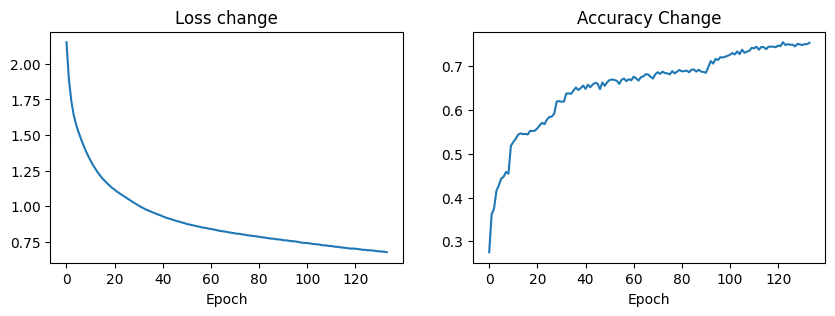

In [110]:
# Plotting loss and validation scores

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_)
plt.title("Loss change")
plt.xlabel("Epoch")


plt.subplot(1, 2, 2)
plt.plot(mlp.validation_scores_)
plt.title("Accuracy Change")
plt.xlabel("Epoch")
plt.show()

In [ ]:
# Overfit the model

layers: List[int] = ["???"]
mlp = MLPClassifier(hidden_layer_sizes=layers, early_stopping=True, max_iter=10000)
mlp.fit(x_train_small, y_train_small)

## Checking model's performance on training data

preds = mlp.predict(x_train_small)
print(f"F1 Macro train: {f1_score(y_train_small, preds, average='macro')}")
print(classification_report(y_train_small, preds))

## Checking model's performance on test data

preds = mlp.predict(x_test)
print(f"F1 Macro test: {f1_score(y_test, preds, average='macro')}")
print(classification_report(y_test, preds))

# Plotting loss and validation scores

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_)
plt.title("Loss change")
plt.xlabel("Epoch")


plt.subplot(1, 2, 2)
plt.plot(mlp.validation_scores_)
plt.title("Accuracy Change")
plt.xlabel("Epoch")
plt.show()

In [ ]:
# Regularize the model by adding more data

layers: List[int] = ["???"]
mlp = MLPClassifier(hidden_layer_sizes=layers, early_stopping=True, max_iter=10000)
mlp.fit(x_train, y_train)

## Checking model's performance

preds = mlp.predict(x_test)
print(f"F1 Macro: {f1_score(y_test, preds, average='macro')}")
print(classification_report(y_test, preds))

# Plotting loss and validation scores

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(mlp.loss_curve_)
plt.title("Loss change")
plt.xlabel("Epoch")


plt.subplot(1, 2, 2)
plt.plot(mlp.validation_scores_)
plt.title("Accuracy Change")
plt.xlabel("Epoch")
plt.show()

### To do:
* Overfit the data by configuring large neural network
* Regularize the model by adding more data
* Look for the most optimal parameters by following guide: http://karpathy.github.io/2019/04/25/recipe/